# Title

### Wormhole


### Terra Bridge




### Objective

As Wormhole has added Terra support with the Columbus 5 upgrade, analyze the initial activity: 
* How many users are engaging, what tokens are they receiving vs sending? 
* Which destinations/sources are most popular? 
* What is the adoption rate, i.e. how rapidly are users choosing to use Wormhole over the Terra-specific Bridge? 
* Anything else you observe of interest?


### Data


### Query
The query used to retrieve the relevant data can be found [here](https://app.flipsidecrypto.com/velocity/queries/5027ee2e-4de7-41dd-8686-072046b3ce8b). Some main points to highlight:
* 
* 
* 

In [172]:
tokens = {
    'terra14tl83xcwqjy0ken9peu4pjjuu755lrry2uy25r': {'symbol':'whWETH',
                                                    'asset_chain':2},
    'terra1ce06wkrdm4vl6t0hvc0g86rsy27pu8yadg3dva': {'symbol':'whUSDT',
                                                    'asset_chain':2},
    'terra1e6mq63y64zcxz8xyu5van4tgkhemj3r86yvgu4':{'symbol':'wh',
                                                    'asset_chain':1},
       'terra190tqwgqx7s8qrknz6kckct7v607cu068gfujpk':{'symbol':'whSOL',
                                                    'asset_chain':1},
       'terra1hd9n65snaluvf7en0p4hqzse9eqecejz2k8rl5':{'symbol':'wh',
                                                    'asset_chain':1},
       'terra19phjr9363x44yukx6dl6d4zvn2wqc8gpkk0tm7':{'symbol':'whETH',
                                                    'asset_chain':1},
       'terra1tuleqeucunvs9rga3dq5h35ew3ml8uv9a4snzx':{'symbol':'whMIR',
                                                    'asset_chain':4},
       'terra19t8cxscre0jss7nejqy29c97fkg7els3v8zujg':{'symbol':'wh',
                                                    'asset_chain':1},
       'terra1kcthelkax4j9x8d3ny6sdag0qmxxynl3qtcrpy':{'symbol':'MINE',
                                                    'asset_chain':3},
       'terra16q5pke2vueu23y8punvj70h0cp0s0rc7vrzl57':{'symbol':'wh',
                                                    'asset_chain':1},
       'terra15gwkyepfc6xgca5t5zefzwy42uts8l2m4g40k6':{'symbol':'MIR',
                                                    'asset_chain':3},
       'terra14z56l0fp2lsf86zy3hty2z47ezkhnthtr9yq76':{'symbol':'ANC',
                                                    'asset_chain':3},
       'terra1k7tstwhf25wm45x329ny84xe4n2z2nnq9ekuv2':{'symbol':'wh',
                                                    'asset_chain':1},
       'terra1gdapfuda0dxtjc98raemhszntcxty7chyr0wpd':{'symbol':'whORION',
                                                    'asset_chain':1},
       'terra1aa7upykmmqqc63l924l5qfap8mrmx5rfdm0v55':{'symbol':'whWBTC',
                                                    'asset_chain':2},
       'terra1mddcdx0ujx89f38gu7zspk2r2ffdl5enyz2u03':{'symbol':'ORION',
                                                    'asset_chain':3},
       'terra1cetg5wruw2wsdjp7j46rj44xdel00z006e9yg8':{'symbol':'whWBNB',
                                                    'asset_chain':4},
       'terra1xu3nyee55dfe5vxqtg9m4rkex8u2t6n2etl08h':{'symbol':'whUSDT',
                                                    'asset_chain':5},
       'terra127ww0al7uj9vyg7cv2gtcqenhrjzlnq5vaq6dh':{'symbol':'whUST',
                                                    'asset_chain':5},
       'terra1fme0uqgjucph3kelyejm6yuj60e4te8647gx6v':{'symbol':'whLUNA',
                                                    'asset_chain':5},
       'terra1vlqeghv5mt5udh96kt5zxlh2wkh8q4kewkr0dd':{'symbol':'whUSDT',
                                                    'asset_chain':4},
       'terra1kkyyh7vganlpkj0gkc2rfmhy858ma4rtwywe3x':{'symbol':'whUSDC',
                                                    'asset_chain':5},
       'terra132zppkzw88j35hpwxkrpzymujekky3wcuru65n':{'symbol':'whATOM',
                                                    'asset_chain':4}
}

### Chain IDs:
* 1 -> Solana
* 2 -> Ethereum
* 3 -> Terra
* 4 -> BSC
* 5 -> Polygon

In [173]:
chain_ids = ['Solana', 'Ethereum', 'Terra', 'BSC', 'Polygon']

## Analysis

**Imports**

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.options.display.max_colwidth = 10000

In [233]:
url_wh_receive = 'https://api.flipsidecrypto.com/api/v2/queries/657279fb-8a07-4089-bf08-307fb7f1325d/data/latest'
url_wh_send = 'https://api.flipsidecrypto.com/api/v2/queries/6cecbc05-4540-4c33-9557-585aec1af791/data/latest'

In [234]:
wh_receive_raw = pd.read_json(url_wh_receive)
wh_send_raw = pd.read_json(url_wh_send)

In [235]:
wh_receive = wh_receive_raw[['AMOUNT', 'BLOCK_TIMESTAMP', 'CHAIN_ID',
       'DENOM', 'ORIGINAL_SENDER', 'RECIPIENT', 'SENDER',
       'TX_ID', 'TX_MODULE', 'TX_STATUS', 'TX_TYPE']]
wh_receive = wh_receive[wh_receive.TX_STATUS == 'SUCCEEDED']
wh_receive.columns = [s.lower() for s in wh_receive.columns]

In [236]:
wh_send_raw = wh_send_raw[wh_send_raw.TX_STATUS == 'SUCCEEDED']
wh_send = wh_send_raw[['BLOCK_TIMESTAMP',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:AMOUNT',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:INFO:NATIVE_TOKEN:DENOM',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:INFO:TOKEN:CONTRACT_ADDR',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:RECIPIENT_CHAIN',
       'MSG_VALUE:SENDER', 'TX_ID']]
wh_send.columns = ['block_timestamp',
       'amount',
       'denom',
       'token_contract_addr',
       'recipient_chain',
       'sender', 'tx_id']
wh_send.block_timestamp = pd.to_datetime(wh_send.block_timestamp)
wh_send.token_contract_addr=wh_send.token_contract_addr.apply(lambda x: x.replace("\"","") if x else '')
wh_send.denom=wh_send.denom.apply(lambda x: x.replace("\"","") if x else '')
wh_send.amount=wh_send.amount.apply(lambda x: x.replace("\"","") if x else '').astype('int64')
wh_send.sender=wh_send.sender.apply(lambda x: x.replace("\"","") if x else '')
wh_send['token_addr_name'] = wh_send.token_contract_addr.apply(lambda x: 
                                            f"{tokens[x]['symbol']}_{chain_ids[tokens[x]['asset_chain']-1]}" if x in tokens else '')

In [237]:
wh_send['month_day'] = wh_send.block_timestamp.apply(lambda b: f"{b.month}_{'{:02}'.format(b.day)}")

In [238]:
wh_send.tx_id.count()

2891

In [239]:
len(wh_send.sender.unique())

1485

In [240]:
wh_send.sender.value_counts()

terra1vrq3yzujgmfrqyp6der9w8j3audmw497tgpytl    52
terra1zhgnqk9gq295qtqqa9j5shmm7lkp9e66m937jr    36
terra1dtzfwgzt8xa70zkm8gqzwz0n4zrqtngdpqejx5    25
terra143nl3cv60s8uyyg4m3a5se5vphv0wct6mpcadk    25
terra1nckkt3jx9xna820c4zjfyedz97vel0g6s8sh35    23
                                                ..
terra16tqwjfa8cdseh0xyv5929zya4hdpqdt0832k9u     1
terra1rqkx43uw4dnlxc3lukv4jetcjc23qxecmqfzaq     1
terra16y9quzrk7y3dkv3k7pfu4zqvn9zqkankv26ncl     1
terra1yymclxkxtzp4zsk2na0gvmmwv36tpht490xarn     1
terra1wrx893xfphqaedsu3zdvkc9jwvq279uskjk96f     1
Name: sender, Length: 1485, dtype: int64

In [241]:
wh_send.recipient_chain.apply(lambda n: chain_ids[n-1]).value_counts()

Solana      2425
BSC          321
Ethereum     121
Polygon       24
Name: recipient_chain, dtype: int64

In [242]:
wh_send['token_name'] = wh_send.apply(lambda r: r.denom if r.denom else r.token_addr_name, axis=1)

<AxesSubplot:>

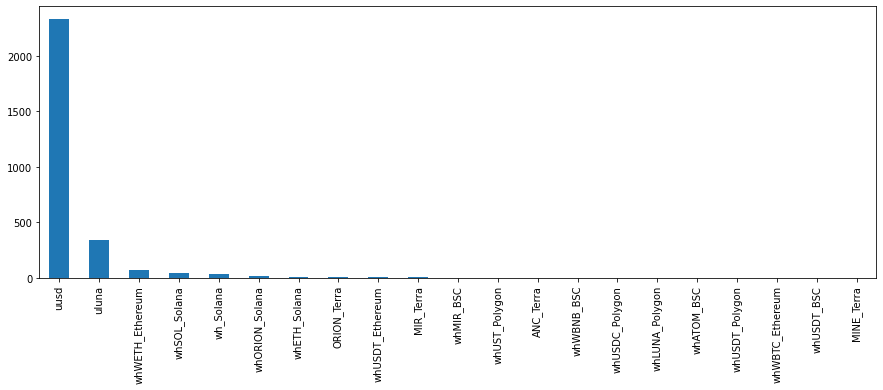

In [243]:
wh_send.token_name.value_counts().plot(kind='bar')

<AxesSubplot:>

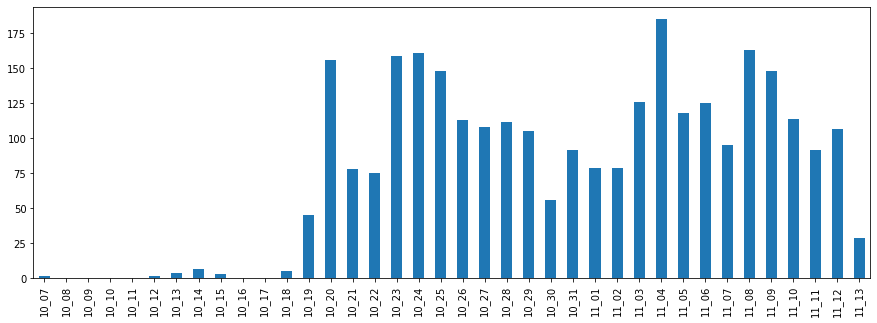

In [244]:
daily_txs = wh_send.month_day.value_counts()
daily_txs['10_08'] = 0
daily_txs['10_09'] = 0
daily_txs['10_10'] = 0
daily_txs['10_11'] = 0
daily_txs['10_16'] = 0
daily_txs['10_17'] = 0
daily_txs.sort_index().plot(kind='bar')

In [245]:
daily_txs[daily_txs.index > '10_19'].mean()

112.92

<AxesSubplot:xlabel='month_day'>

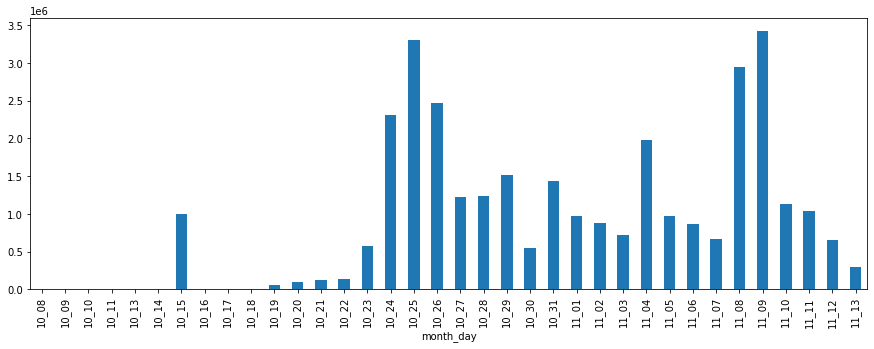

In [246]:
tmp = wh_send[wh_send.token_name == 'uusd'].sort_values(by="amount", ascending=False)[10:]
daily_uusd = (tmp[tmp.token_name == 'uusd'].groupby('month_day').sum().amount/1000000)
daily_uusd['10_08'] = 0
daily_uusd['10_09'] = 0
daily_uusd['10_10'] = 0
daily_uusd['10_11'] = 0
daily_uusd['10_16'] = 0
daily_uusd['10_17'] = 0
daily_uusd.sort_index().plot(kind='bar')

In [247]:
wh_send[wh_send.token_name == 'uusd'].sort_values(by="amount", ascending=False).head()

,block_timestamp,amount,denom,token_contract_addr,recipient_chain,sender,tx_id,token_addr_name,month_day,token_name
873,2021-10-14 02:07:07+00:00,41999990000000,uusd,,2,terra1dtzfwgzt8xa70zkm8gqzwz0n4zrqtngdpqejx5,C1213BE51F64E9F320C0D39B0AAF36C289CF586BE2496E80463B95BED87CB22D,,10_14,uusd
671,2021-10-30 00:08:27+00:00,30000000000000,uusd,,1,terra1dtzfwgzt8xa70zkm8gqzwz0n4zrqtngdpqejx5,EA2EF5D68656CE6EECF9A692A17EA16460CE3C0F50AEA05C5A8D27FAE1226F6D,,10_30,uusd
997,2021-10-19 02:37:19+00:00,30000000000000,uusd,,1,terra1dtzfwgzt8xa70zkm8gqzwz0n4zrqtngdpqejx5,10559288DADEDCEADC403D4E49EF61164AD7C181FCF4079DFCB5243F83736D2E,,10_19,uusd
845,2021-10-14 05:05:58+00:00,8100000000000,uusd,,2,terra1dtzfwgzt8xa70zkm8gqzwz0n4zrqtngdpqejx5,4E079FFBFDF7B9956B7816582A334DE4679C93F26A67E6D649146EC3288BEE8A,,10_14,uusd
3093,2021-11-04 16:51:14+00:00,5000000000000,uusd,,1,terra1qggut0tm799s0sy65cnzdela3yj2rfamd2sssf,3B276F4801818D28C178DACA3E9B894B88302678B0D68861BF5160BB34B82E5C,,11_04,uusd


In [248]:
wh_send.loc[873]

block_timestamp                                               2021-10-14 02:07:07+00:00
amount                                                                   41999990000000
denom                                                                              uusd
token_contract_addr                                                                    
recipient_chain                                                                       2
sender                                     terra1dtzfwgzt8xa70zkm8gqzwz0n4zrqtngdpqejx5
tx_id                  C1213BE51F64E9F320C0D39B0AAF36C289CF586BE2496E80463B95BED87CB22D
token_addr_name                                                                        
month_day                                                                         10_14
token_name                                                                         uusd
Name: 873, dtype: object

<AxesSubplot:>

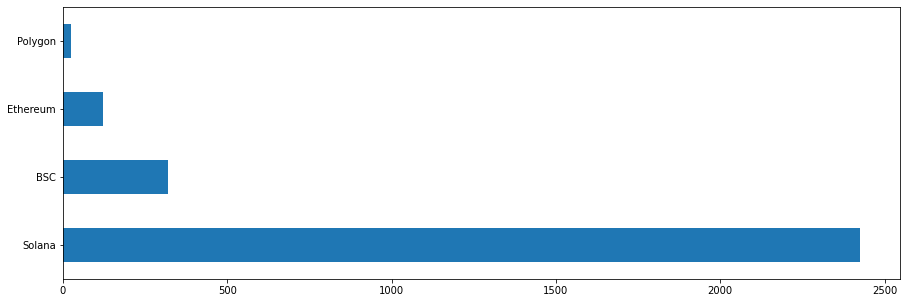

In [249]:
wh_send["recipient_chain_name"]=wh_send.recipient_chain.apply(lambda x: chain_ids[x-1])
wh_send["recipient_chain_name"].value_counts().plot(kind='barh')